### Importando bibliotecas

In [1]:
# pipenv install scikit-learn scipy pandas matplotlib seaborn ipykernel gradio

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Carregando os dados

In [2]:
# Carregar o arquivo
df_colesterol = pd.read_csv('./datasets/dataset_colesterol.csv')

In [3]:
# Checar o arquivo
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [4]:
# Remover coluna id pois na predição ela não será útil
df_colesterol.drop(columns=['Id'], axis=1, inplace=True)

In [5]:
# Remover espaço no nome das colunas
# removendo nome maiusculo das colunas
# Renomear as colunas
df_colesterol.columns=[
  'grupo_sanguineo',
  'fumante',
  'nivel_atividade_fisica',
  'idade',
  'peso',
  'altura',
  'nivel_colesterol'
]

# nivel_colesterol será nosso target (variavel dependente)

In [6]:
df_colesterol.head(5)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23


In [7]:
# Copiar DF para DF EDA
df_colesterol_eda = df_colesterol.copy()

In [8]:
# Copiar DF para DF Bucketing
df_colesterol_bucketing = df_colesterol.copy()

### Realizando EDA

In [9]:
# Lidando com valores numéricos
# Visualizar os dados
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [10]:
df_colesterol_eda.grupo_sanguineo.unique()

array(['B', 'A', 'O', 'AB', nan], dtype=object)

In [11]:
# Detectar Valores ausentes
df_colesterol_eda.isna().sum()

grupo_sanguineo           4
fumante                   3
nivel_atividade_fisica    4
idade                     3
peso                      3
altura                    3
nivel_colesterol          0
dtype: int64

In [12]:
# vericar as  Medidas estatísticas do DF
df_colesterol_eda.describe()

,idade,peso,altura,nivel_colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [13]:
# Coletar medidas das variaveis categoricas pela moda
moda_grupo_sang = df_colesterol_eda.grupo_sanguineo.mode()
moda_fumante = df_colesterol_eda.fumante.mode()
moda_nivel_atividade = df_colesterol_eda.nivel_atividade_fisica.mode()

In [14]:
# Coletar medidas das variaveis numericas pela mediana
mediana_idade = df_colesterol_eda.idade.median()
mediana_peso = df_colesterol_eda.peso.median()
mediana_altura = df_colesterol_eda.altura.median()

In [15]:
# Inputar valores ausentes
df_colesterol_eda.fillna(value={'grupo_sanguineo': moda_grupo_sang[0],
                                'fumante': moda_fumante[0],
                                'nivel_atividade_fisica': moda_nivel_atividade[0],
                                'idade': mediana_idade,
                                'peso':mediana_peso,
                                'altura': mediana_altura}, inplace=True)

In [16]:
# Visualizar os dados após substituição de valores ausentes
# Detectar Valores ausentes
df_colesterol_eda.isna().sum()

grupo_sanguineo           0
fumante                   0
nivel_atividade_fisica    0
idade                     0
peso                      0
altura                    0
nivel_colesterol          0
dtype: int64

In [17]:
# Converter o tipo das variaveis idade e altura de float para inteiro
df_colesterol_eda.idade = df_colesterol_eda.idade.astype(int)
df_colesterol_eda.altura = df_colesterol_eda.altura.astype(int)

In [18]:
# Estrutura do DF
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         1000 non-null   object 
 1   fumante                 1000 non-null   object 
 2   nivel_atividade_fisica  1000 non-null   object 
 3   idade                   1000 non-null   int64  
 4   peso                    1000 non-null   float64
 5   altura                  1000 non-null   int64  
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [19]:
# visualizar os dados
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
9,B,Sim,Alto,44,32.7,165,97.79


<Axes: xlabel='grupo_sanguineo', ylabel='nivel_colesterol'>

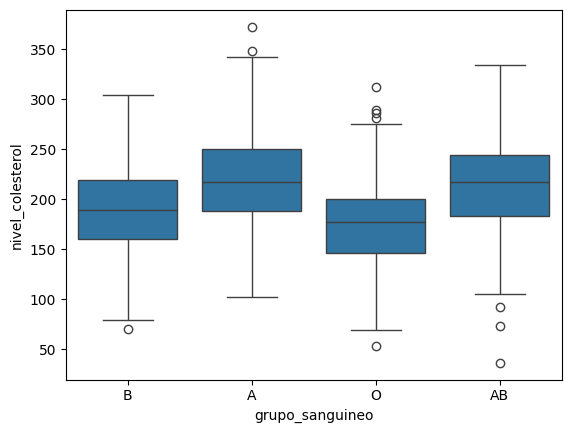

In [20]:
# Verificar / detectar outliers
sns.boxplot(x='grupo_sanguineo', y='nivel_colesterol', data=df_colesterol_eda)

<Axes: xlabel='peso'>

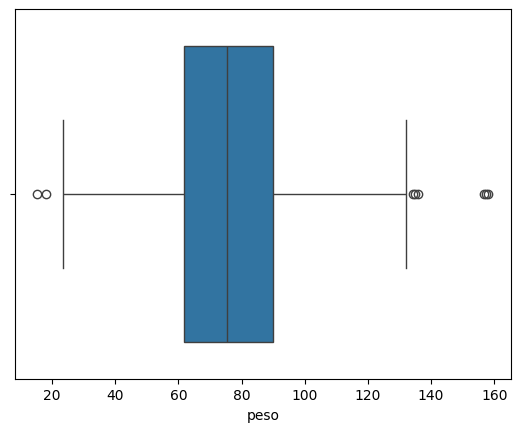

In [23]:
# Verificar / detectar outliers
sns.boxplot(x='peso', data=df_colesterol_eda)

In [25]:
# Considerando o outlier de pessoas com peso extremamente baixo
# Como o publico está entre 20 e 79 anos, podemos considerar um erro de input

#Vamos filtrar o publico a ser removido
df_colesterol_eda[df_colesterol_eda['peso'] < 40].peso.count()

np.int64(37)

In [27]:
# Remover publico do dataframe
df_colesterol_eda.drop(df_colesterol_eda[df_colesterol_eda['peso'] < 40]
                       .index, axis=0, inplace=True)

In [28]:
# Verificando novamente a estrutura após o drop das linhas
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         963 non-null    object 
 1   fumante                 963 non-null    object 
 2   nivel_atividade_fisica  963 non-null    object 
 3   idade                   963 non-null    int64  
 4   peso                    963 non-null    float64
 5   altura                  963 non-null    int64  
 6   nivel_colesterol        963 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 60.2+ KB


<Axes: xlabel='peso'>

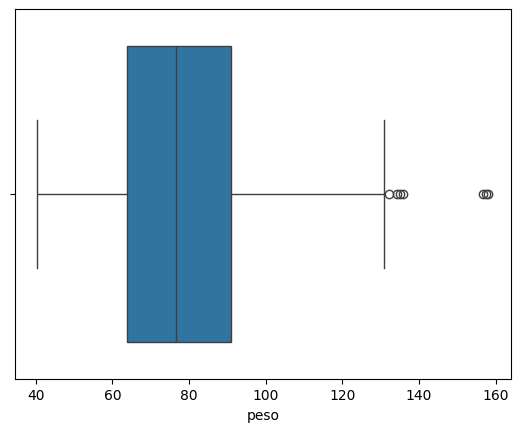

In [29]:
# Verificar se o outlier da parte inferior foi removida
sns.boxplot(x='peso', data=df_colesterol_eda)

<Axes: xlabel='altura'>

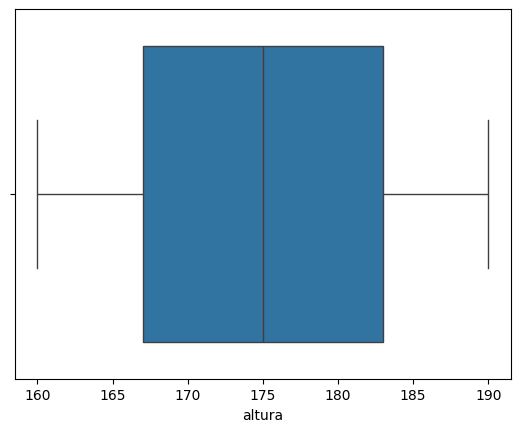

In [30]:
# Verificar / detectar outliers - Altura
sns.boxplot(x='altura', data=df_colesterol_eda)

<Axes: xlabel='nivel_colesterol'>

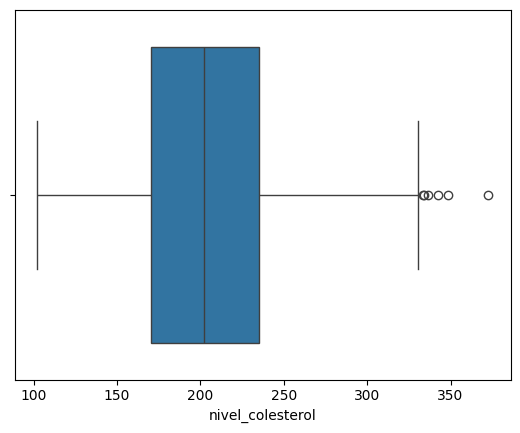

In [31]:
# Verificar / detectar outliers
sns.boxplot(x='nivel_colesterol', data=df_colesterol_eda)

<Axes: xlabel='grupo_sanguineo', ylabel='nivel_colesterol'>

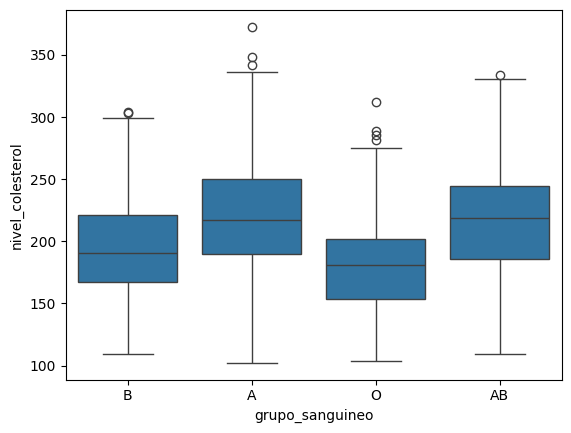

In [32]:
# Cruzamento de Variaveis Categoricas com nivel de Colesterol
sns.boxplot(data=df_colesterol_eda,x='grupo_sanguineo', y='nivel_colesterol' )

<Axes: xlabel='fumante', ylabel='nivel_colesterol'>

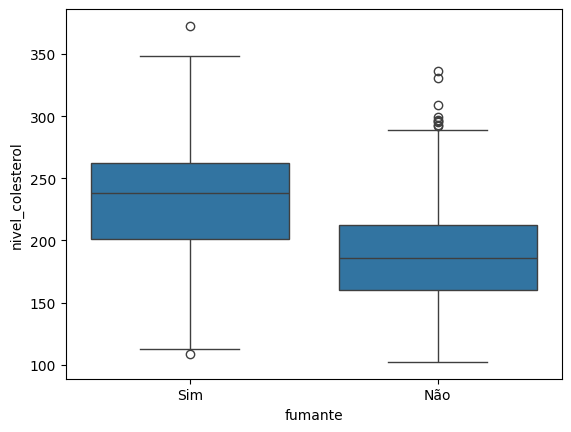

In [33]:
# Cruzamento de Variaveis Categoricas com nivel de Colesterol
sns.boxplot(data=df_colesterol_eda,x='fumante', y='nivel_colesterol' )

<Axes: xlabel='nivel_atividade_fisica', ylabel='nivel_colesterol'>

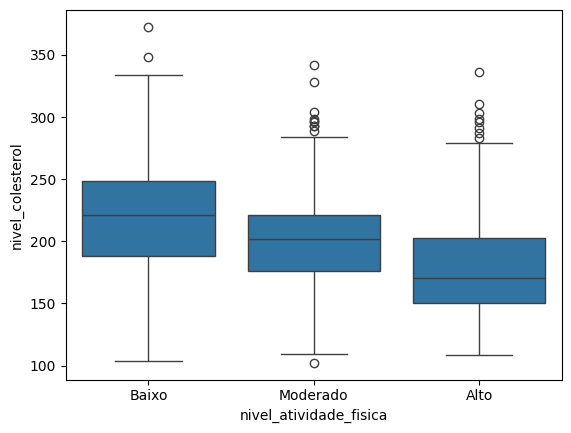

In [34]:
# Cruzamento de Variaveis Categoricas com nivel de Colesterol
sns.boxplot(data=df_colesterol_eda,x='nivel_atividade_fisica', y='nivel_colesterol' )